In [0]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
ukpop = 20
gen = 16
pc = 0.5
pm = 0.5

**Inisiasi populasi awal**
*Integer encoding*

In [0]:
def generate_populasi(ukpop, gen) :
  populasi = []
  for i in range (ukpop) :
    populasi.append(np.random.randint(low=0, high=9, size=gen))

  return populasi
populasi = generate_populasi(ukpop, gen) 

**Find Phenotype (Decoding)**

In [0]:
def phenotype(individu) :
  pembagi_x1 = 0
  pengali_x1 = 0
  pembagi_x2 = 0
  pengali_x2 = 0
  
  ra_x1 = 3
  rb_x1 = -3
  ra_x2 = 2
  rb_x2 = -2
  j = 1
  k = 1
  for i in range (len(individu)) :
    if (i < len(individu) / 2) :
      pengali_x1 += (individu[i] * (1 / np.power(10, j)))
      pembagi_x1 += (1 / np.power(2, j))
      j += 1
    else :
      pengali_x2 += (individu[i] * (1 / np.power(10, k)))
      pembagi_x2 += (1 / np.power(2, k))
      k += 1
  
  x1 = rb_x1 + ((ra_x1 - rb_x1) * pengali_x1 / pembagi_x1)
  x2 = rb_x2 + ((ra_x2 - rb_x2) * pengali_x2 / pembagi_x2)
  
  fen = []
  fen.append(x1)
  fen.append(x2)
  
  return fen

**Calculate Fitness**

In [0]:
def fitness(individu) :
  a = 0.01
  f = 1 / (((4 - 2 * (phenotype(individu)[0] ** 2) + (phenotype(individu)[0] ** 4) / 3) * (phenotype(individu)[0] ** 2 + (phenotype(individu)[0] * phenotype(individu)[1]) + (-4 + 4 * (phenotype(individu)[1] ** 2)) * (phenotype(individu)[1] ** 2))) + a)
  return f

**Total fitness**

In [0]:
def total_fitness(populasi) :
  total = 0
  for i in range (len(populasi)) :
    total += fitness(populasi[i])
    
  return total

**Return individu with the biggest fitness**

In [0]:
def max_fitness(populasi) :
  fit = []
  for i in range (len(populasi)) :
    fit.append(fitness(populasi[i]))
  max = 0
  for i in range(len(populasi)) :
    if (max < fit[i]) :
      max = fit[i]
  idx = fit.index(max)
  return populasi[idx]

**Roulette wheel**

In [0]:
def RW (fitness, total_fitness) :
  val = fitness / total_fitness
  return val

In [0]:
def CRW (populasi) :
  c = 0
  ar_c = []
  for i in range (len(populasi)) :
    c += RW(fitness(populasi[i]), total_fitness(populasi))
    ar_c.append(c)
  return ar_c


**Parent selection with Roulette wheel**

In [0]:
def parent_selection(populasi) :
  parent = []
  for i in range(len(populasi)) :
    ketemu = 'false'
    r = np.random.uniform(low = np.amin(CRW(populasi)), high = np.amax(CRW(populasi)))
    j = 0
    while ((ketemu != 'true') and (j < len(populasi))) :
      if (j == 0) :
        if (r <= CRW(populasi)[0]) :
          parent.append(populasi[0])
          ketemu = 'true'
      else :
        if (r <= CRW(populasi)[j] and r > CRW(populasi)[j-1]) :
          parent.append(populasi[j])
          ketemu = 'true'
      j += 1
  return parent

par = np.copy(parent_selection(populasi))

**Crossover**

In [0]:
def crossover(individu1, individu2, pc) :
  anak = []
  anak1 = []
  anak2 = []
  titik = np.random.randint(1, len(individu1) - 1)
  p = np.random.uniform()
  if (p >= pc) :
    for j in range (len(individu1)) :
      if (j < titik) :
        anak1.append(individu2[j])
        anak2.append(individu1[j])
      else :
        anak1.append(individu1[j])
        anak2.append(individu2[j])
    anak.append(anak1)
    anak.append(anak2)
  else :
    for j in range (len(individu1)) :
      anak1.append(individu1[j])
      anak2.append(individu2[j])
    anak.append(anak1)
    anak.append(anak2)
  return anak

pos = 0
cross = []
i = 0
for i in range (ukpop//2) :
  cross.append(crossover(par[pos], par[pos+1], pc)[0])
  cross.append(crossover(par[pos], par[pos+1], pc)[1])
  pos += 2


**Mutation**

In [0]:
def mutasi(cross, pm) :  
  ar_mut = np.copy(cross)
  for i in range (len(ar_mut)) :
    rm = np.random.randint(0,9)
    j = 0
    p = np.random.uniform()
    if (p >= pm) :
      for j in range(len(ar_mut[i])) :
        if (cross[i][j] == rm) :
          mut = np.random.randint(0,9)
          ar_mut[i][j] = mut
  return ar_mut


**General replacement**

In [0]:
def replace(populasi, pm) :
  new_pop = []
  j = 0
  while (j < len(populasi)) :
    if (j == 0) :
      new_pop.append(max_fitness(populasi))
    else : 
      new_pop.append(mutasi(populasi,pm)[j])
    j += 1
  return new_pop

**Driver program**

(x1, x2) =  [-1.3002933007058821, 0.925213655843137]
f(x1, x2 ) =  -0.008304062626391882


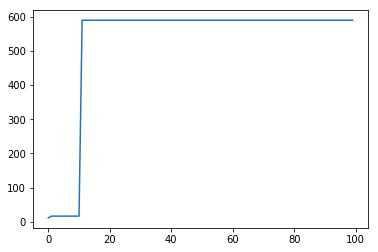

In [100]:
generasi = 100
old_gen = generate_populasi(ukpop, gen) 

fit_plot = []

for i in range(generasi) :
  new_gen = np.copy(replace(old_gen,pm))
  old_gen = np.copy(new_gen)
  new_gen = np.copy(replace(old_gen,pm))
  fit_plot.append(fitness(max_fitness(new_gen)))
  
individu_hasil = max_fitness(new_gen)
nilai = phenotype(individu_hasil)
x1 = nilai[0]
x2 = nilai[1]
print("(x1, x2) = ", nilai)
val = ((4 - 2 * (x1 ** 2) + (x1 ** 4) / 3) * (x1 ** 2 + (x1 * x2) + (-4 + 4 * (x2 ** 2)) * (x2 ** 2)))
print("f(x1, x2 ) = ", val)
plt.plot(fit_plot)
plt.show()

**The objective function**

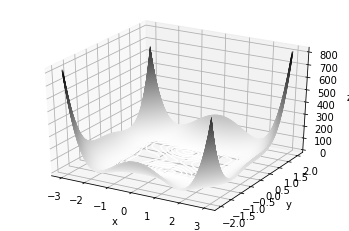

In [97]:
def f(x, y):
    return ((4 - 2 * (x ** 2) + (x ** 4) / 3) * (x ** 2 + (x * y) + (-4 + 4 * (y ** 2)) * (y ** 2)))
  
x = np.linspace(-3, 3, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 1000, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

